# Import libs

In [1]:
### first remove tensorflow and other unnessesary python warnings.

In [3]:
from silence_tensorflow import silence_tensorflow
silence_tensorflow ()

from warnings import filterwarnings
filterwarnings('ignore')

In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import cv2
import random

import tensorflow as tf
import keras

print(colored('All libraries imported succesfully !', 'green', attrs=['bold']))

All libraries imported succesfully !


# Import data

In [10]:
# locatoin of stored dataset
base_dir = '/home/nima/Datasets/Rice_Image_Dataset'

# loop over dataset folder to detect classes
classes = [class_name for class_name in os.listdir(base_dir) if class_name]

# remove .txt and .pdf file in classes and print it
classes.remove('Rice_Citation_Request.txt')
classes.remove('S0168169921003021.pdf')
print(classes)

['Ipsala', 'Jasmine', 'Basmati', 'Karacadag', 'Arborio']


## plot random images

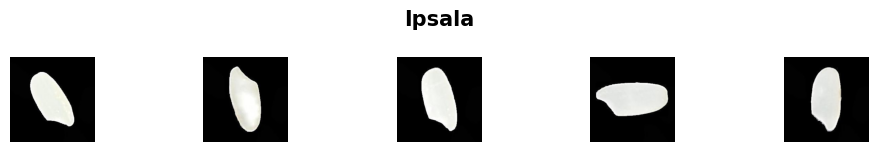

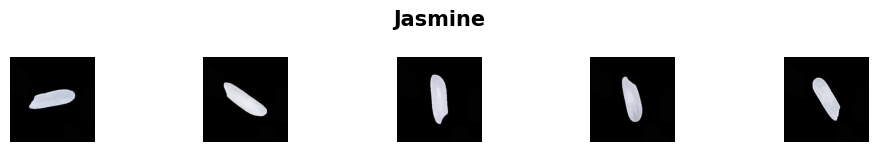

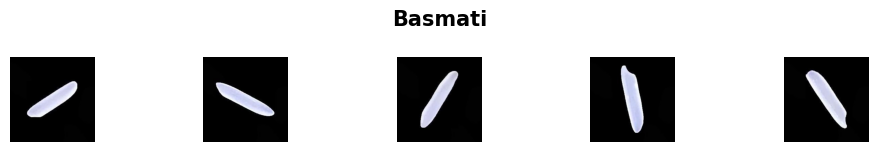

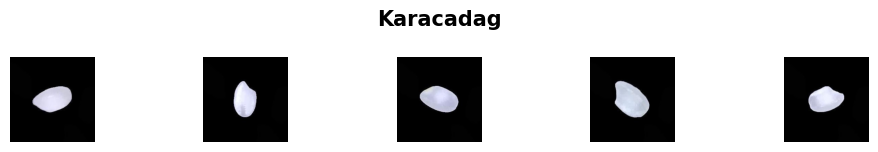

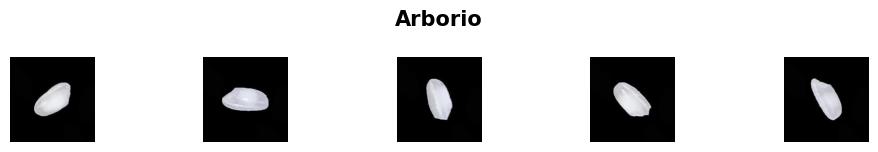

In [27]:
for class_name in classes :
    # print(class_name)
    class_path = os.path.join(base_dir, class_name)
    # print(class_path)
    images = os.listdir(class_path)
    random_images = random.choices(images, k=5)
    # print(random_images)
    fig, ax = plt.subplots(1, 5, figsize=(10, 1.5))
    for i in range(5) :
        plt.suptitle(class_name, fontsize=15, fontweight='bold')
        img = os.path.join(class_path, random_images[i])
        img = keras.utils.load_img(img)
        ax[i].imshow(img)
        ax[i].axis('off')
    plt.tight_layout()

Sum of all class length : 75000


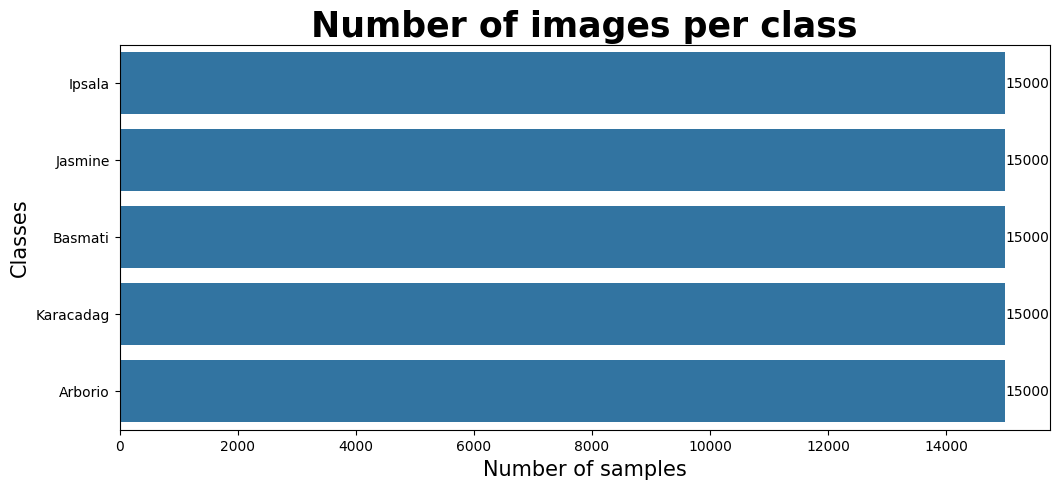

In [43]:
counts = []
for class_name in classes :

    class_path = os.path.join(base_dir, class_name)

    counts.append(len(os.listdir(class_path)))

print(colored(f'Sum of all class length : {sum(counts)}', 'green', attrs=['bold']))


plt.figure(figsize=(12, 5))
ax = sns.barplot(y=classes, x=counts)
# Annotate each bar with the count
for i, p in enumerate(ax.patches):
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2., 
            '{}'.format(counts[i]),
            va="center", fontsize=10)
# Set plot title
plt.title('Number of images per class', fontsize=25, fontweight='bold')
# Set Y-axis label
plt.ylabel('Classes', fontsize=15)
# Set X-axis label
plt.xlabel('Number of samples', fontsize=15)
# Show plot
plt.show()

# Preprocessing

In [44]:
# Convert our data to tensorflow dataset by keras.utils.image_dataset_from_directory
train_full = keras.utils.image_dataset_from_directory(
    directory=base_dir,        # Path of base directory
    labels='inferred',         # to generate labels from the directory structure
    label_mode='categorical',  # type of labels
    class_names=classes,       # list of class_names
    shuffle=True,              # To shuffle dataset
    seed=42,                   # Optional random seed for shuffling and transformations
    batch_size=32,             # Define batch size
    image_size=(250, 250)      # Size to resize images to after they are read from disk
 )

Found 75000 files belonging to 5 classes.
